In [13]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt


In [14]:
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

x_sgd = torch.tensor([-2.0, 2.0], requires_grad=True)
x_rmsprop = x_sgd.clone().detach().requires_grad_(True)
x_adam = x_sgd.clone().detach().requires_grad_(True)

sgd_optimizer = optim.SGD([x_sgd], lr=0.001)
rmsprop_optimizer = optim.RMSprop([x_rmsprop], lr=0.01)
adam_optimizer = optim.Adam([x_adam], lr=0.01)

epochs = 500
sgd_losses = []
rmsprop_losses = []
adam_losses = []


In [15]:
for epoch in range(epochs):
    # SGD
    sgd_optimizer.zero_grad()
    loss_sgd = rosenbrock(x_sgd[0], x_sgd[1])
    loss_sgd.backward()
    sgd_optimizer.step()
    sgd_losses.append(loss_sgd.item())

    # RMSprop
    rmsprop_optimizer.zero_grad()
    loss_rmsprop = rosenbrock(x_rmsprop[0], x_rmsprop[1])
    loss_rmsprop.backward()
    rmsprop_optimizer.step()
    rmsprop_losses.append(loss_rmsprop.item())

    # Adam
    adam_optimizer.zero_grad()
    loss_adam = rosenbrock(x_adam[0], x_adam[1])
    loss_adam.backward()
    adam_optimizer.step()
    adam_losses.append(loss_adam.item())

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, SGD Loss: {loss_sgd.item()}, RMSprop Loss: {loss_rmsprop.item()}, Adam Loss: {loss_adam.item()}")



Epoch 0, SGD Loss: 409.0, RMSprop Loss: 409.0, Adam Loss: 409.0
Epoch 20, SGD Loss: 5.112126350402832, RMSprop Loss: 7.865478038787842, Adam Loss: 124.67768859863281
Epoch 40, SGD Loss: 5.056363105773926, RMSprop Loss: 6.595073223114014, Adam Loss: 26.3436279296875
Epoch 60, SGD Loss: 5.000258922576904, RMSprop Loss: 6.580411434173584, Adam Loss: 7.924703598022461
Epoch 80, SGD Loss: 4.9438018798828125, RMSprop Loss: 6.572562217712402, Adam Loss: 6.57970666885376
Epoch 100, SGD Loss: 4.886983394622803, RMSprop Loss: 6.563911437988281, Adam Loss: 6.598118782043457
Epoch 120, SGD Loss: 4.829791069030762, RMSprop Loss: 6.554344654083252, Adam Loss: 6.577996253967285
Epoch 140, SGD Loss: 4.772215366363525, RMSprop Loss: 6.543765068054199, Adam Loss: 6.5712480545043945
Epoch 160, SGD Loss: 4.714243412017822, RMSprop Loss: 6.532063007354736, Adam Loss: 6.5681915283203125
Epoch 180, SGD Loss: 4.655861854553223, RMSprop Loss: 6.519121170043945, Adam Loss: 6.564836502075195
Epoch 200, SGD Loss:

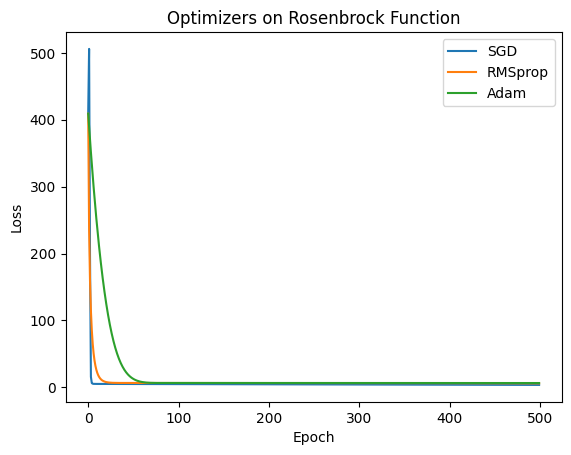

In [16]:
plt.plot(sgd_losses, label="SGD")
plt.plot(rmsprop_losses, label="RMSprop")
plt.plot(adam_losses, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Optimizers on Rosenbrock Function")
plt.legend()
plt.show()